# Link to tweet
https://twitter.com/franciscojarceo/status/1506265499449106435?s=20&t=yGmOyNMcEmDyGCfmqRXzfg

In [33]:
! pip3 install pandas

  Using cached pandas-1.5.0-cp310-cp310-macosx_10_9_x86_64.whl (12.0 MB)
  Using cached numpy-1.23.3-cp310-cp310-macosx_10_9_x86_64.whl (18.1 MB)


In [11]:
! pip3 install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 18.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.1/241.1 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 25.9 MB/s eta 0:00:0000:0100:01
  Using cached fonttools-4.37.4-py3-none-any.whl (960 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)


In [1]:
import os
import json
import requests
import time
import pandas as pd

from matplotlib import pyplot as plt
plt.rcParams['axes.axisbelow'] = True

In [2]:
%matplotlib inline

In [3]:
API_KEY = json.load(open('.env', 'rb'))['POLYGON']

In [28]:
def get_marketcap(TICKER: str) -> dict:
    url = f'https://api.polygon.io/v3/reference/tickers/{TICKER}?apiKey={API_KEY}'
    r = requests.get(url)
    return r.json()

def get_historical_price_data(TICKER: str='AAPL', START_DATE: str='2019-01-01', END_DATE: str='2022-10-01') -> pd.DataFrame:
    url = f'https://api.polygon.io/v2/aggs/ticker/{TICKER}/range/1/day/{START_DATE}/{END_DATE}?adjusted=true&sort=asc&limit=50000&apiKey={API_KEY}'
    try:
        r = requests.get(url)
        rdf = pd.DataFrame(r.json())
        rdf = pd.concat([rdf, pd.json_normalize(rdf['results'])], axis=1)
        rdf['t'] = pd.to_datetime(rdf['t']*1e6)
        x = get_marketcap(TICKER)
        rdf['weighted_shares_outstanding'] = x['results']['weighted_shares_outstanding']
        rdf['market_cap'] = rdf['weighted_shares_outstanding'] * rdf['c']
        return rdf
    except Exception as e:
        print(f'something went wrong for {TICKER}...\n {e}')
    return pd.DataFrame()

In [29]:
rdf = get_historical_price_data('AFRM')
rdf.rename({
    'v': 'trading volume of the symbol in the given time period',
    'vw': 'volume weighted average price',
    'o': 'open price for the symbol in the given time period',
    'c': 'close price for the symbol in the given time period',
    'h': 'highest price for the symbol in the given time period', 
    'l': 'lowest price for the symbol in the given time period',
    't': 'Unix Msec timestamp for the start of the aggregate window.',
    'n': 'number of transactions in the aggregate window',
}, axis=1, inplace=False).head()

,ticker,queryCount,resultsCount,adjusted,results,status,request_id,count,trading volume of the symbol in the given time period,volume weighted average price,open price for the symbol in the given time period,close price for the symbol in the given time period,highest price for the symbol in the given time period,lowest price for the symbol in the given time period,Unix Msec timestamp for the start of the aggregate window.,number of transactions in the aggregate window,weighted_shares_outstanding,market_cap
0,AFRM,433,433,True,"{'v': 25158956.0, 'vw': 95.9724, 'o': 90.9, 'c...",OK,517f9202bdbae9beace0ab0384db4ae2,433,25158956.0,95.9724,90.900,97.24,103.000,90.01,2021-01-13 05:00:00,225291,289068859,2.810906e+10
1,AFRM,433,433,True,"{'v': 20858687.0, 'vw': 116.0875, 'o': 103.5, ...",OK,517f9202bdbae9beace0ab0384db4ae2,433,20858687.0,116.0875,103.500,114.94,137.980,101.00,2021-01-14 05:00:00,244483,289068859,3.322557e+10
2,AFRM,433,433,True,"{'v': 8308763.0, 'vw': 114.2754, 'o': 123.054,...",OK,517f9202bdbae9beace0ab0384db4ae2,433,8308763.0,114.2754,123.054,117.00,127.240,107.00,2021-01-15 05:00:00,96173,289068859,3.382106e+10
3,AFRM,433,433,True,"{'v': 3304914.0, 'vw': 112.3161, 'o': 117, 'c'...",OK,517f9202bdbae9beace0ab0384db4ae2,433,3304914.0,112.3161,117.000,110.99,117.675,108.00,2021-01-19 05:00:00,49218,289068859,3.208375e+10
4,AFRM,433,433,True,"{'v': 5091417.0, 'vw': 106.8402, 'o': 110, 'c'...",OK,517f9202bdbae9beace0ab0384db4ae2,433,5091417.0,106.8402,110.000,106.21,112.000,103.25,2021-01-20 05:00:00,50980,289068859,3.070200e+10


In [32]:
def call_tickers_rate_limited(tickers: list, n: int=5, duration:int=60) -> list:
    sleep_time = 0 if n == 0 else duration / n
    output = []
    for ticker in tickers:
        res = get_historical_price_data(ticker)
        if res.shape[0] > 0:
            output.append(res)
        if n > 0:
            time.sleep(sleep_time)
    return output

In [33]:
tickers = [
    # original chart
    'FISV',
    'GPN',
    'STNE',
    'EVOP',
    'FIS',
    'PAGS',
    'SQ',
    'PYPL',
     'V',
    'MA',
    'ADYEY',
    # additional fintech
    'NRDS',
    'COIN',
    'GDOT',
    'LMND',
    'UPST',
    'OPRT',
    'SOFI',
    'MELI',
    'AFRM',
    'ROOT',
    'MQ',
    'NU',
    'HOOD',
    'LC',
    'INTU',
]

ticker_dict = {
    'FISV': 'Fiserv Inc.',
    'GPN': 'Global Payments Inc.',
    'STNE': 'StoneCo Ltd.',
    'EVOP': 'EVO Payments Inc.',
    'FIS': 'FIS',
    'PAGS': 'PagSeguro Digital Ltd.',
    'SQ': 'Block Inc',
    'PYPL': 'PayPal Holdings Inc.',
    'V': 'Visa Inc.',
    'MA': 'Mastercard Inc.',
    'ADYEY': 'Adyen',
    'NRDS': 'Nerdwallet Inc.',
    'COIN': 'Coinbase Global Inc.',
    'GDOT': 'Green Dot Corporation',
    'LMND': 'Lemonade Inc.',
    'UPST': 'Upstart Holdings Inc.',
    'OPRT': 'Oportun Financial Corp.',
    'SOFI': 'SoFi Technologies Inc.',
    'MELI': 'MercadoLibre Inc.',
    'AFRM': 'Affirm Holdings Inc.',
    'ROOT': 'Root Inc.',
    'MQ': 'Marqeta Inc.',
    'NU': 'Nu Holdings Ltd.',
    'HOOD': 'Robinhood Markets Inc.',
    'LC': 'LendingClub Corp.',
    'INTU': 'Intuit Inc.',
    'TOST': 'Toast, Inc.',
    'HIPO': 'Hippo Holdings Inc.',
    'ML': 'Moneylion Inc.',
    'BLND': 'Blend Labs Inc.',
}

tickers = list(ticker_dict.keys())

odf = call_tickers_rate_limited(tickers, n=0)

something went wrong for ADYEY...
 'weighted_shares_outstanding'


In [34]:
xdates = set()
for r, i in enumerate(odf):
    print(r, i['ticker'].unique()[0], i['resultsCount'].unique()[0], i['t'].min(), i['t'].max())
    xdates = xdates.union(set(i['t'].unique().tolist()))

0 FISV 945 2019-01-02 05:00:00 2022-09-30 04:00:00
1 GPN 945 2019-01-02 05:00:00 2022-09-30 04:00:00
2 STNE 945 2019-01-02 05:00:00 2022-09-30 04:00:00
3 EVOP 945 2019-01-02 05:00:00 2022-09-30 04:00:00
4 FIS 945 2019-01-02 05:00:00 2022-09-30 04:00:00
5 PAGS 945 2019-01-02 05:00:00 2022-09-30 04:00:00
6 SQ 945 2019-01-02 05:00:00 2022-09-30 04:00:00
7 PYPL 945 2019-01-02 05:00:00 2022-09-30 04:00:00
8 V 945 2019-01-02 05:00:00 2022-09-30 04:00:00
9 MA 945 2019-01-02 05:00:00 2022-09-30 04:00:00
10 NRDS 228 2021-11-04 04:00:00 2022-09-30 04:00:00
11 COIN 371 2021-04-14 04:00:00 2022-09-30 04:00:00
12 GDOT 945 2019-01-02 05:00:00 2022-09-30 04:00:00
13 LMND 567 2020-07-02 04:00:00 2022-09-30 04:00:00
14 UPST 451 2020-12-16 05:00:00 2022-09-30 04:00:00
15 OPRT 760 2019-09-26 04:00:00 2022-09-30 04:00:00
16 SOFI 338 2021-06-01 04:00:00 2022-09-30 04:00:00
17 MELI 945 2019-01-02 05:00:00 2022-09-30 04:00:00
18 AFRM 433 2021-01-13 05:00:00 2022-09-30 04:00:00
19 ROOT 485 2020-10-28 04:00:00

In [231]:
def clean_data(outdf, dates, td, index=False, xvar='c'):
    cols = ['t']
    rdf = pd.DataFrame(pd.to_datetime(list(dates)), columns=['t'])

    for i, tdf in enumerate(outdf):
        # indexed
        tmp = rdf.merge(tdf, how='left', left_on='t', right_on='t')
        tmp.sort_values(by='t', inplace=True)
        if index:
            tmp[xvar] = tmp[xvar] / tmp[tmp[xvar].notna()][xvar].values[0]
        ticker = tmp.loc[tmp['ticker'].notna(), 'ticker'].unique()[0]
        tmp.rename({xvar: ticker}, axis=1, inplace=True)
        if type(ticker) == str:
            cols.append(ticker)
            rdf = tmp[cols]
        else:
            print(f'excluding {ticker}')
            break

    rdf.rename(td, axis=1, inplace=True)
    return rdf

In [314]:
fdf = clean_data(odf, xdates, ticker_dict, True, 'c')

mcdf = clean_data(odf, xdates, ticker_dict, False, 'market_cap')

/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_65077/878331895.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rdf.rename(td, axis=1, inplace=True)
/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_65077/878331895.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rdf.rename(td, axis=1, inplace=True)


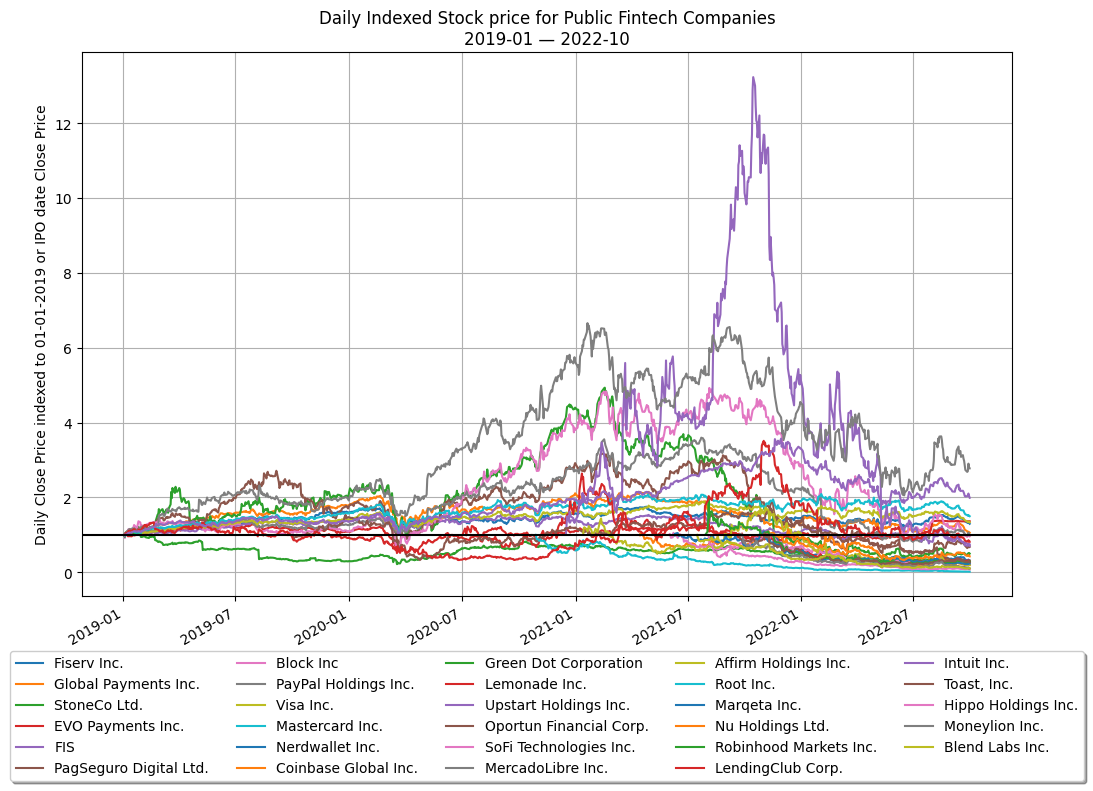

In [315]:
fdf.plot(x='t', figsize=(12, 8))
plt.grid()
plt.title('Daily Indexed Stock price for Public Fintech Companies\n2019-01 — 2022-10')
plt.ylabel('Daily Close Price indexed to 01-01-2019 or IPO date Close Price')
plt.axhline(y=1, c='black')
plt.legend(loc='center', bbox_to_anchor=(0.5, -.22), ncol=5, fancybox = True, shadow = True)
plt.show()

In [71]:
mcdf = clean_data(odf, xdates, ticker_dict, False, 'market_cap')

/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_65077/2740494369.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf.rename(td, axis=1, inplace=True)


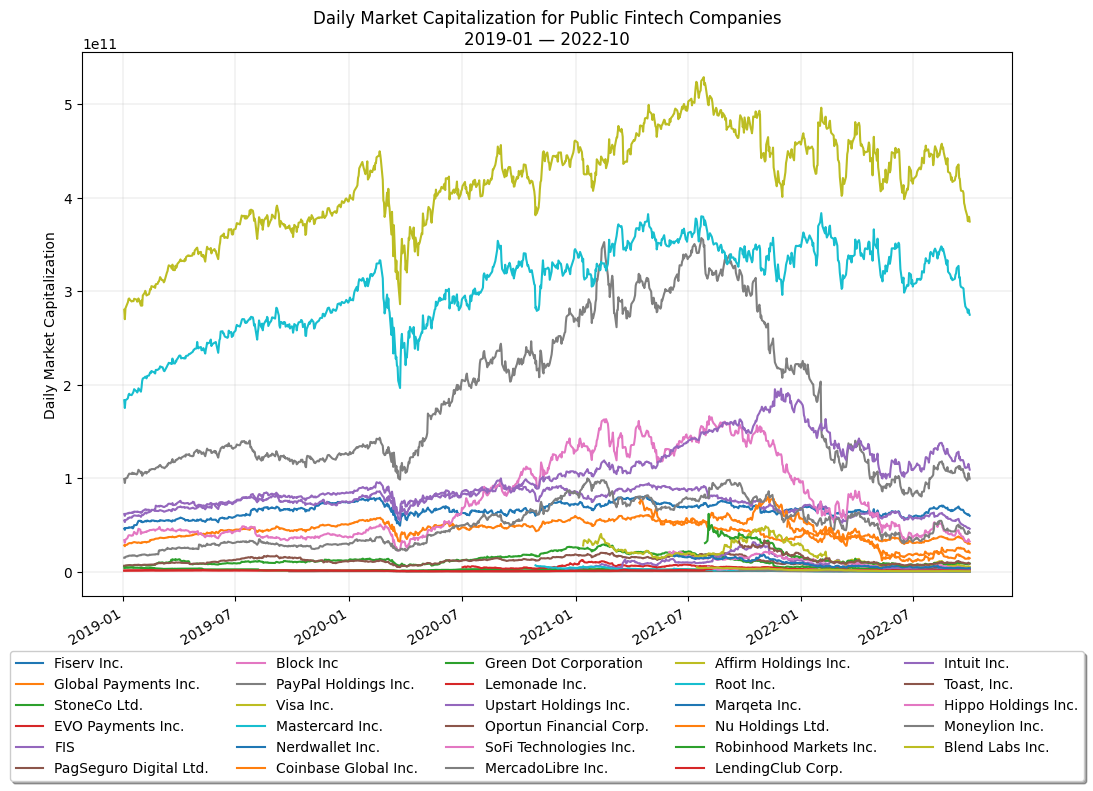

In [320]:
mcdf.plot(x='t', figsize=(12, 8))
plt.grid((4, 4), linewidth=0.2)
plt.title('Daily Market Capitalization for Public Fintech Companies\n2019-01 — 2022-10')
plt.ylabel('Daily Market Capitalization')
plt.legend(loc='center', bbox_to_anchor=(0.5, -.22), ncol=5, fancybox = True, shadow = True)
plt.show()

In [322]:
mcdf['Fintech Market Cap'] = mcdf[mcdf.columns[1:]].fillna(0).sum(axis=1)

/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_65077/3945194700.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mcdf['Fintech Market Cap'] = mcdf[mcdf.columns[1:]].fillna(0).sum(axis=1)


In [323]:
# billis
mcdf['Fintech Market Cap (Billions $)'] = mcdf['Fintech Market Cap'] / 1e9

/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_65077/2948362817.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mcdf['Fintech Market Cap (Billions $)'] = mcdf['Fintech Market Cap'] / 1e9


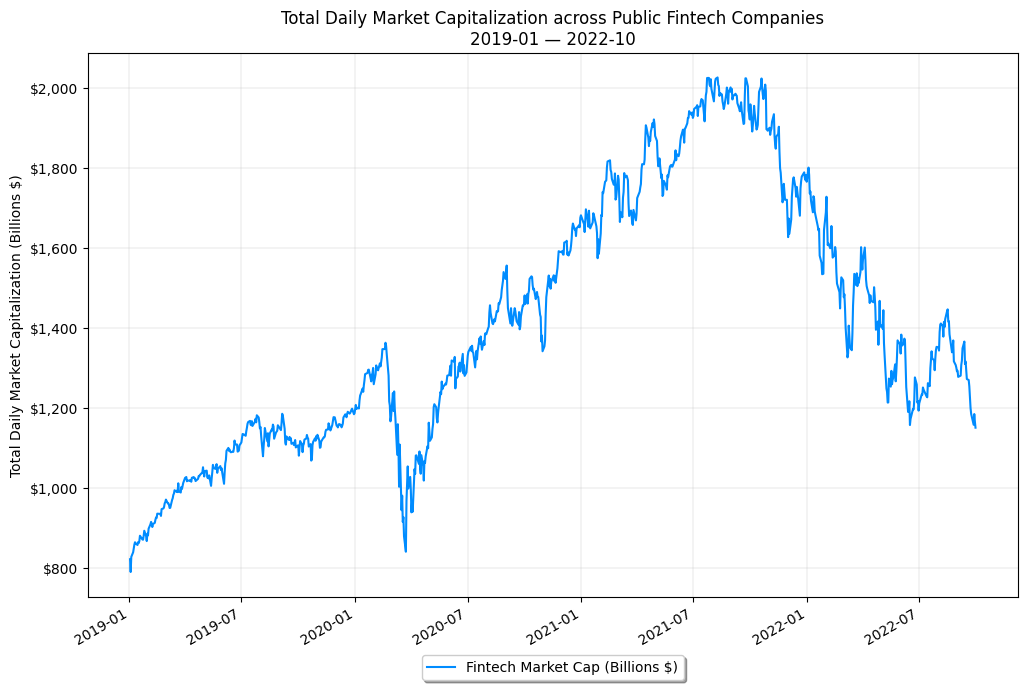

In [324]:
import matplotlib.ticker as mtick

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)

mcdf[['t', 'Fintech Market Cap (Billions $)']].plot(x='t', figsize=(12, 8), c='#008cff', ax=ax)
plt.grid((4, 4), linewidth=0.2)
plt.title('Total Daily Market Capitalization across Public Fintech Companies\n2019-01 — 2022-10')
plt.ticklabel_format(axis='y', style='plain')
plt.ylabel('Total Daily Market Capitalization (Billions $)')
ax.yaxis.set_major_formatter(tick) 
plt.xlabel('')
plt.legend(loc='center', bbox_to_anchor=(0.5, -.13), ncol=5, fancybox = True, shadow = True)
plt.show()

In [327]:
print('Max Market Cap for Fintech Companies = ${:,.0f}'.format(mcdf['Fintech Market Cap'][mcdf['Fintech Market Cap'].argmax()]))

Max Market Cap for Fintech Companies = $2,026,581,323,248


In [114]:
sd = {}
for ticker in mcdf.columns[1:]:
    sd[ticker] = {
        '01-01-2019': mcdf[mcdf[ticker].notna()][ticker].values[0],
        '09-30-2022': mcdf[mcdf[ticker].notna()][ticker].values[-1],
    }

In [132]:
sdf = pd.DataFrame(sd).T
sdf.sort_values(by='01-01-2019', ascending=False, inplace=True)
sdf['Dollar Change'] = sdf['09-30-2022'] -  sdf['01-01-2019']
sdf['Percent Change'] = sdf['09-30-2022'] / sdf['01-01-2019'] - 1.

print('Total Change in Market Cap for Fintech Companies = ${:,.0f}'.format(sdf['Dollar Change'].sum()))

sdf['01-01-2019'] = sdf['01-01-2019'].apply(lambda x: '${:,.0f}'.format(x))
sdf['09-30-2022'] = sdf['09-30-2022'].apply(lambda x: '${:,.0f}'.format(x))
sdf['Dollar Change'] = sdf['Dollar Change'].apply(lambda x: '${:,.0f}'.format(x))

Total Change in Market Cap for Fintech Companies = $48,735,108,392


In [144]:
sdf.rename({
    '01-01-2019': '01-01-2019 or IPO date'
}, axis=1).style.background_gradient(cmap = 'RdYlGn')

,01-01-2019 or IPO date,09-30-2022,Dollar Change,Percent Change
Visa Inc.,"$280,117,302,198","$374,381,874,327","$94,264,572,129",0.336518
Mastercard Inc.,"$183,360,196,281","$274,779,372,881","$91,419,176,600",0.498577
PayPal Holdings Inc.,"$99,167,806,196","$99,537,878,475","$370,072,280",0.003732
Coinbase Global Inc.,"$73,910,417,091","$14,519,565,000","$-59,390,852,091",-0.803552
FIS,"$61,667,264,935","$45,944,939,477","$-15,722,325,458",-0.254954
Intuit Inc.,"$54,815,235,369","$109,173,841,534","$54,358,606,165",0.991670
Nu Holdings Ltd.,"$48,306,676,792","$20,575,932,032","$-27,730,744,761",-0.574056
Fiserv Inc.,"$46,184,385,769","$59,845,907,442","$13,661,521,673",0.295804
Block Inc,"$33,759,076,666","$32,454,748,704","$-1,304,327,962",-0.038636
"Toast, Inc.","$32,291,666,778","$8,637,284,731","$-23,654,382,047",-0.732523


In [328]:
sdf['color'] = sdf['Percent Change'].apply(lambda x: '#008cff' if x > 0 else '#ff000d')
sdf.sort_values(by='Percent Change', inplace=True)

/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_65077/2077112304.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels([f'{x:.0%}' for x in plt.gca().get_xticks()])


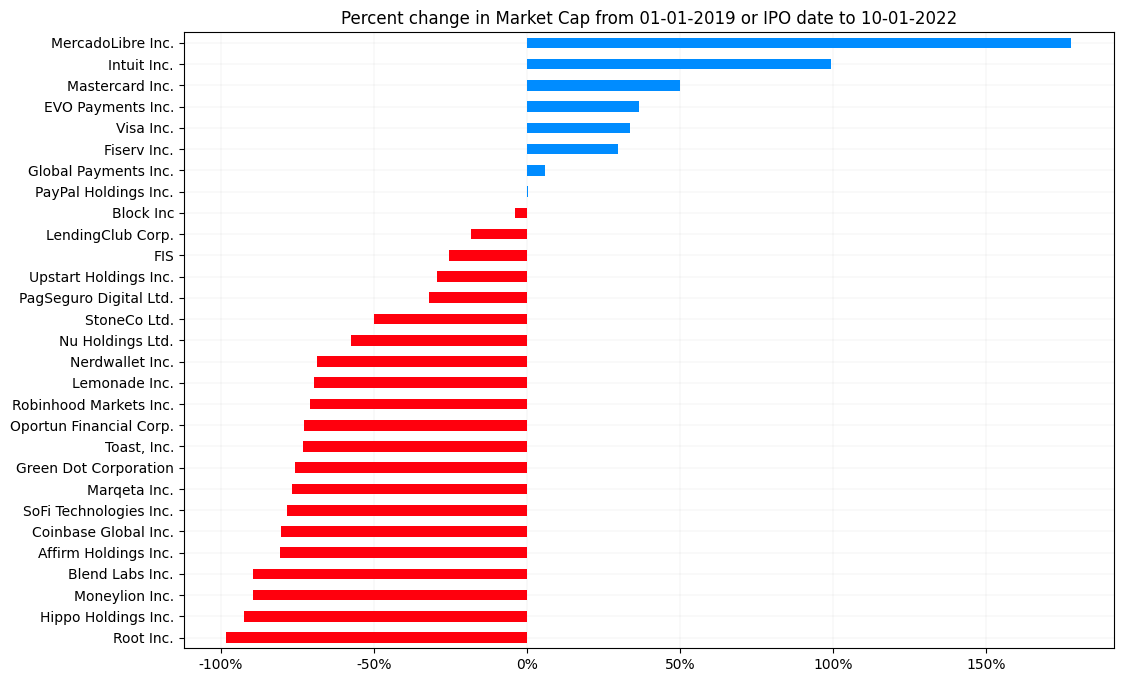

In [330]:
sdf.plot(y='Percent Change', kind='barh', figsize=(12, 8), color=sdf['color'].tolist(), legend=False)
plt.grid((4, 4), linewidth=0.1)
plt.gca().set_xticklabels([f'{x:.0%}' for x in plt.gca().get_xticks()]) 
plt.title('Percent change in Market Cap from 01-01-2019 or IPO date to 10-01-2022')
plt.show()